In [2]:
# Biblioteca Numpy
import numpy as np

# Biblioteca pandas
import pandas as pd

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt

In [3]:
# Entrada de dados
x = [-1., -0.77777778, -0.55555556, -0.33333333, -0.11111111, 0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.]
y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657, 1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

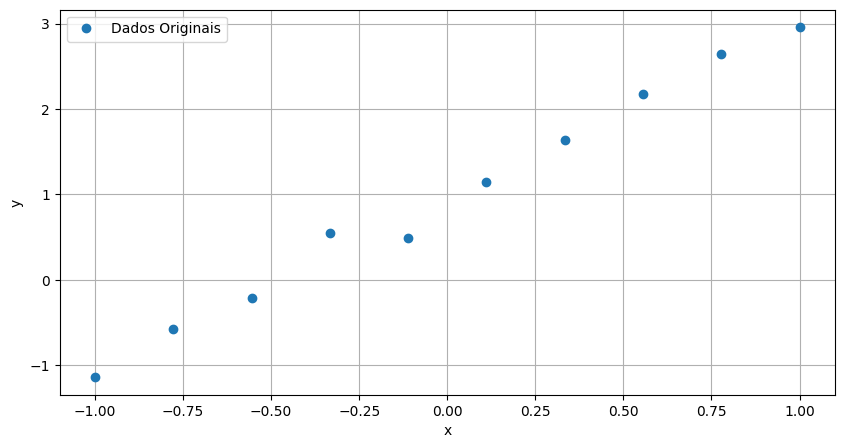

In [4]:
plt.figure(figsize=(10,5)) #Tamanho da figura 10x5
plt.plot(x, y, 'o', label='Dados Originais') # 'o' indica que quero um plot do tipo escater (com os pontos), 
# caso eu deixasse sem nada ele me traria um plot com uma linha
plt.legend() # expor o label
plt.xlabel("x") # Legenda do eixo x
plt.ylabel("y") # legenda do eixo y
plt.grid() # Mostra o grid ao fundo, de distância entre os valores
plt.show()

In [5]:
# Trasformando a entrada de dados, as listas x e y em numpy arrays
# E converter a dimensão para o valor correto
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [10]:
# modelo
from sklearn.linear_model import LinearRegression

In [11]:
# treinando o modelo: y = a*x + b, valores reais (a, b) = (2,1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [12]:
# Coeficientes a, b estimados:
# valores estimados usando o numpy diretamente
# a estimado no numpy: 2.054149512038485
# b estimado no numpy: 0.967989262
# intercep é o termo independente do modelo
print("a estimado:", reg.coef_.ravel()[0])
print("b estimado:", reg.intercept_[0])

a estimado: 2.054149512038486
b estimado: 0.967989262


In [13]:
# predição do modelo
y_pred = reg.predict(x)

In [14]:
# score do modelo
score = reg.score(x, y)
print("score:", score)

score: 0.9911602676388085


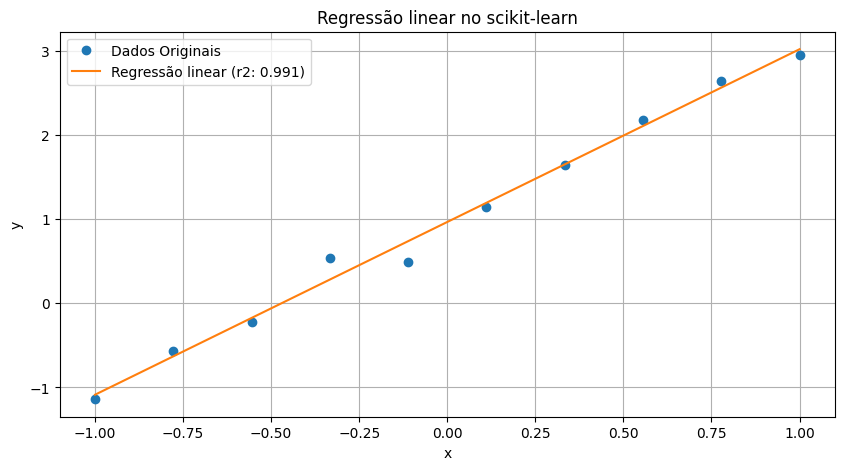

In [16]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label = 'Dados Originais')
plt.plot(x,y_pred, label='Regressão linear (r2: {:.3f})'.format(score))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

# Regressão linear no scikit-learn II

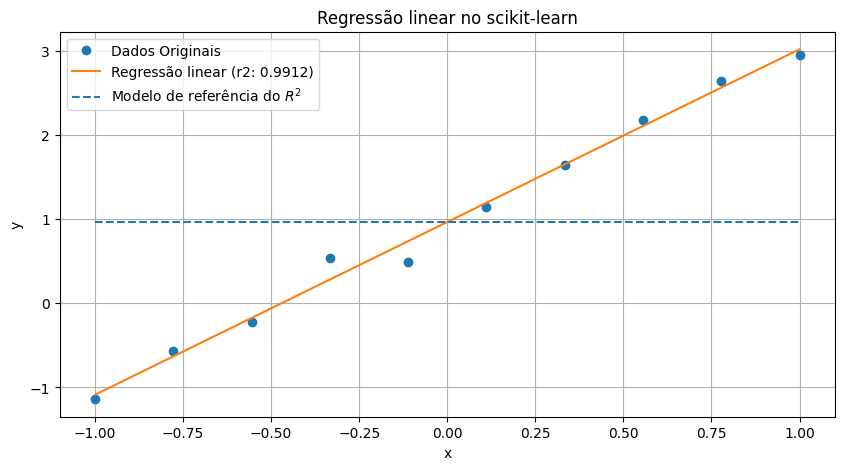

In [17]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label = 'Dados Originais')
plt.plot(x,y_pred, label='Regressão linear (r2: {:.4f})'.format(score))
# a linha horizontal é a média dos valores de y
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed', label='Modelo de referência do $R^2$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

Erro quadrático médio - uma medida do quão bom ou quão distante o modelo está  
dos valores reais dos dados.  
</br>


In [19]:
# Função para cálculo de MSE
# y_true - valores reais
def mse(y_true, y_pred, is_ref = False):
    
    # mse modelo
    if is_ref:
        mse = ((y_true - y_true.mean())**2).mean()
    else:
        mse = ((y_true - y_pred)**2).mean()
    
    return mse

In [20]:
# Função para cálculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
    return 1 - mse_reg/mse_ref

In [21]:
# Visualizando y e y_pred
print("y_true:", y.ravel())
print("y_pred:", y_pred.ravel())

y_true: [-1.13956201 -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684202]
y_pred: [-1.08616025 -0.62968259 -0.17320492  0.28327276  0.73975043  1.19622809
  1.65270576  2.10918344  2.56566111  3.02213877]


In [22]:
# Calculando o mse dos modelos
mse_reg = mse(y_true=y, y_pred=y_pred)
print("MSE do modelo de regressão:", mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print("MSE do modelo de referência:", mse_ref)

MSE do modelo de regressão: 0.015331627377597704
MSE do modelo de referência: 1.734399498892871


In [23]:
# Calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado (calculado):", r2_score)

Coeficiente R2 do modelo implementado (calculado): 0.9911602676388085


In [24]:
# score retornado pelo scikit-learn
r2_score_skl = reg.score(x, y)
print("Coeficiente R2 do modelo implementado (scikit-learn):", r2_score_skl)

Coeficiente R2 do modelo implementado (scikit-learn): 0.9911602676388085
